<a href="https://colab.research.google.com/github/soujanyanayak/easy-farming/blob/development/plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plant Disease Detection

Step 1: Install Packages

In [1]:
!sudo apt -y install libportaudio2
!pip install -q --use-deprecated=legacy-resolver tflite-model-maker
!pip install -q pycocotools
!pip install -q opencv-python-headless==4.1.2.30
!pip uninstall -y tensorflow && pip install -q tensorflow==2.8.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 64.6 kB of archives.
After this operation, 215 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Fetched 64.6 kB in 0s (172 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
d

Step 2: Mount Google Drive

In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Step 3: Import

In [9]:
import numpy as np
import os

from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

In [10]:
spec = model_spec.get('efficientdet_lite0')

In [48]:
#sxdzawq  setup the directory names

data_dir="/content/drive/MyDrive/collab/project3/Plant-diseases"
image_dir="/content/drive/MyDrive/collab/project3/Plant-diseases"
label_map_file ="/content/drive/MyDrive/collab/project3/Plant-diseases/label_map.pbtxt"
print("image_dir\n")
print(image_dir)

test_dir="/content/drive/MyDrive/collab/project3/Plant-diseases/test"
train_dir="/content/drive/MyDrive/collab/project3/Plant-diseases/train"
valid_dir="/content/drive/MyDrive/collab/project3/Plant-diseases/valid"



trainAnnotations_dir="/content/drive/MyDrive/collab/project3/Plant-diseases/train_annotations"
validationAnnotations_dir="/content/drive/MyDrive/collab/project3/Plant-diseases/valid_annotations"
testAnnotations_dir="/content/drive/MyDrive/collab/project3/Plant-diseases/test_annotations"

print("\n\nannotations\n")
print(trainAnnotations_dir)
print(validationAnnotations_dir)
print(testAnnotations_dir)
print("\n\nlabel_map_file")
!cat $label_map_file
%ls -1 {train_dir} | wc -l
%ls -1 {valid_dir} | wc -l
%ls -1 {test_dir} | wc -l



image_dir

/content/drive/MyDrive/collab/project3/Plant-diseases


annotations

/content/drive/MyDrive/collab/project3/Plant-diseases/train_annotations
/content/drive/MyDrive/collab/project3/Plant-diseases/valid_annotations
/content/drive/MyDrive/collab/project3/Plant-diseases/test_annotations


label_map_file
item {
    name: "Tomato Early blight leaf",
    id: 1,
    display_name: "Tomato Early blight leaf"
}
153
13
4


In [38]:
# Validate if images are in JPEG

import glob
from PIL import Image
filepattern = data_dir + "/train/*"
print(filepattern)
print(filepattern)
files = glob.glob(filepattern)
len(files)
for file in files:
  if ".jpg" in file:
    image = Image.open(file)
    if image.format not in ["JPG", "JPEG"]:
      print (file)
      image.convert("RGB").save(file, "JPEG")
  else:
    print("file not jpg: ", file )

print("****************TRY AGAIN *************")
for file in files:
  if ".jpg" in file:
    image = Image.open(file)
    if image.format not in ["JPG", "JPEG"]:
      print (file)
  else:
    print("file not jpg: ", file )

/content/drive/MyDrive/collab/project3/Plant-diseases/train/*
/content/drive/MyDrive/collab/project3/Plant-diseases/train/*
****************TRY AGAIN *************


In [50]:
#load the data from the Pascal VOC
# this can take a long time depending on how much data you are loading
# for example the MaskDetect data which contains total (train+test+valid) of 2,892 images
# took me approximately 4-5 MINUTES TO LOAD
train_data = object_detector.DataLoader.from_pascal_voc(train_dir, trainAnnotations_dir, label_map={1: "Tomato Early blight leaf"})
validation_data = object_detector.DataLoader.from_pascal_voc(valid_dir, validationAnnotations_dir, label_map={1: "Tomato Early blight leaf"})
test_data = object_detector.DataLoader.from_pascal_voc(test_dir, testAnnotations_dir, label_map={1: "Tomato Early blight leaf"})


In [51]:
#set number of epoch and batch_size to train and then train
epochs = 20
batch_size = 4
model = object_detector.create(train_data, model_spec=spec, batch_size=batch_size, train_whole_model=True, validation_data=validation_data, epochs=epochs)

Epoch 1/5
38/38 [==============================] - 117s 2s/step - det_loss: 1.6860 - cls_loss: 1.0105 - box_loss: 0.0135 - reg_l2_loss: 0.0630 - loss: 1.7491 - learning_rate: 0.0065 - gradient_norm: 1.9218 - val_det_loss: 1.3895 - val_cls_loss: 0.8067 - val_box_loss: 0.0117 - val_reg_l2_loss: 0.0630 - val_loss: 1.4525
Epoch 2/5
38/38 [==============================] - 74s 2s/step - det_loss: 1.3383 - cls_loss: 0.7157 - box_loss: 0.0125 - reg_l2_loss: 0.0630 - loss: 1.4013 - learning_rate: 0.0034 - gradient_norm: 4.7068 - val_det_loss: 1.5025 - val_cls_loss: 0.9469 - val_box_loss: 0.0111 - val_reg_l2_loss: 0.0630 - val_loss: 1.5656
Epoch 3/5
38/38 [==============================] - 74s 2s/step - det_loss: 1.2218 - cls_loss: 0.6221 - box_loss: 0.0120 - reg_l2_loss: 0.0631 - loss: 1.2848 - learning_rate: 0.0016 - gradient_norm: 4.1076 - val_det_loss: 1.4169 - val_cls_loss: 0.8625 - val_box_loss: 0.0111 - val_reg_l2_loss: 0.0631 - val_loss: 1.4800
Epoch 4/5
38/38 [=========================

In [52]:
model.evaluate(test_data)

1/1 [==============================] - 3s 3s/step



{'AP': 0.05064042,
 'AP50': 0.19982743,
 'AP75': 0.001877774,
 'APs': -1.0,
 'APm': 0.024622925,
 'APl': 0.17821783,
 'ARmax1': 0.05263158,
 'ARmax10': 0.08421053,
 'ARmax100': 0.17368421,
 'ARs': -1.0,
 'ARm': 0.17333333,
 'ARl': 0.175,
 'AP_/Tomato Early blight leaf': 0.05064042}

In [53]:
model.export(export_dir=data_dir)

In [61]:
#@title Load the trained TFLite model and define some visualization functions

import cv2

from PIL import Image

model_path = data_dir+'/model.tflite'

# Load the labels into a list
classes = ['???'] * model.model_spec.config.num_classes
label_map = model.model_spec.config.label_map
for label_id, label_name in label_map.as_dict().items():
  classes[label_id-1] = label_name

# Define a list of colors for visualization
COLORS = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)

def preprocess_image(image_path, input_size):
  """Preprocess the input image to feed to the TFLite model"""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.uint8)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  resized_img = tf.cast(resized_img, dtype=tf.uint8)
  return resized_img, original_image


def detect_objects(interpreter, image, threshold):
  """Returns a list of detection results, each a dictionary of object info."""

  signature_fn = interpreter.get_signature_runner()

  # Feed the input image to the model
  output = signature_fn(images=image)

  # Get all outputs from the model
  count = int(np.squeeze(output['output_0']))
  scores = np.squeeze(output['output_1'])
  classes = np.squeeze(output['output_2'])
  boxes = np.squeeze(output['output_3'])

  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
        'bounding_box': boxes[i],
        'class_id': classes[i],
        'score': scores[i]
      }
      results.append(result)
  return results


def run_odt_and_draw_results(image_path, interpreter, threshold=0.5):
  """Run object detection on the input image and draw the detection results"""
  # Load the input shape required by the model
  _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

  # Load the input image and preprocess it
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Run object detection on the input image
  results = detect_objects(interpreter, preprocessed_image, threshold=threshold)

  # Plot the detection results on the input image
  original_image_np = original_image.numpy().astype(np.uint8)
  for obj in results:
    # Convert the object bounding box from relative coordinates to absolute
    # coordinates based on the original image resolution
    ymin, xmin, ymax, xmax = obj['bounding_box']
    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])

    # Find the class index of the current object
    class_id = int(obj['class_id'])

    # Draw the bounding box and label on the image
    color = [int(c) for c in COLORS[class_id]]
    cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)
    # Make adjustments to make the label visible for all objects
    y = ymin - 15 if ymin - 15 > 15 else ymin + 15
    label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
    cv2.putText(original_image_np, label, (xmin, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

  # Return the final image
  original_uint8 = original_image_np.astype(np.uint8)
  return original_uint8

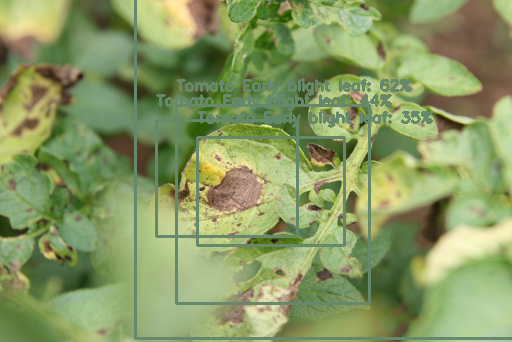

In [64]:
#@title Run object detection and show the detection results

INPUT_IMAGE_URL = "https://www.mofga.org/wp-content/uploads/2022/06/early-blight-potato-2-scaled.jpg" #@param {type:"string"}
DETECTION_THRESHOLD = 0.3 #@param {type:"number"}

TEMP_FILE = '/tmp/image.png'

!wget -q -O $TEMP_FILE $INPUT_IMAGE_URL
im = Image.open(TEMP_FILE)
im.thumbnail((512, 512), Image.ANTIALIAS)
im.save(TEMP_FILE, 'PNG')

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(
    TEMP_FILE,
    interpreter,
    threshold=DETECTION_THRESHOLD
)

# Show the detection result
Image.fromarray(detection_result_image)